<a href="https://colab.research.google.com/github/Diggi14/project_Property/blob/main/3_feature_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Diggi14/property.git

Cloning into 'property'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 34 (delta 16), reused 8 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 2.24 MiB | 8.16 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [ ]:
import re
import pandas as pd
import numpy as np


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
df1=pd.read_csv('property/gurgaon_properties.csv')

In [ ]:
df1['area']=round((df1['price']*10000000)/df1['price_per_sq.ft'])

In [ ]:
df2=pd.read_csv('property/appartments.csv')

In [ ]:
df1.head()

property_name                 society  price  \
0     2 BHK Flat in Krishna Colony  maa bhagwati residency   0.45   
1        2 BHK Flat in Ashok Vihar            Apna Enclave   0.50   
2              2 BHK Flat in Sohna  Tulsiani Easy in Homes   0.40   
3  2 BHK Flat in Sector 61 Gurgaon     Smart World Orchard   1.47   
4  2 BHK Flat in Sector 92 Gurgaon        Parkwood Westend   0.70   

   price_per_sq.ft                            areaWithType  bedRoom  bathroom  \
0             5000          Carpet area: 900 (83.61 sq.m.)        2         2   
1             7692          Carpet area: 650 (60.39 sq.m.)        2         2   
2             6722          Carpet area: 595 (55.28 sq.m.)        2         2   
3            12250        Carpet area: 1200 (111.48 sq.m.)        2         2   
4             5204  Super Built up area 1345(124.95 sq.m.)        2         2   

  balcony additionalRoom                              address  floorNum  \
0       1  Not available     Krishna Colony, Gurgaon, Haryana       4.0   
1       1  Not available   46b, Ashok Vihar, Gurgaon, Haryana       1.0   
2       3  Not available              Sohna, Gurgaon, Haryana      12.0   
3       2     Study Room  Sector 61 Gurgaon, Gurgaon, Haryana       2.0   
4       3     Study Room  Sector 92 Gurgaon, Gurgaon, Haryana       5.0   

  facing       agePossession  \
0   West     1 to 5 Year Old   
1   West        10+ Year Old   
2    NaN     0 to 1 Year Old   
3    NaN            Dec 2023   
4    NaN  Under Construction   

                                     nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   
1  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
2  ['Huda City Metro', 'Golf Course extn road', '...   
3  ['Sector 55-56 Metro station', 'Bestech Centra...   
4  ['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...   

                                         description  \
0  So with lift.Maa bhagwati residency is one of ...   
1  Property situated on main road, railway statio...   
2  This property is 15 km away from badshapur, gu...   
3  Near to metro station of sector 56 and opposit...   
4  We are the proud owners of this 2 bhk alongwit...   

                                      furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   
1  ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...   
2                                                NaN   
3                                                NaN   
4                                                 []   

                                            features  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   
1  ['Security / Fire Alarm', 'Maintenance Staff',...   
2  ['Power Back-up', 'Feng Shui / Vaastu Complian...   
3  ['Security / Fire Alarm', 'Private Garden / Te...   
4                                                NaN   

                                              rating    area  type     sector  
0  ['Environment4 out of 5', 'Safety4 out of 5', ...   900.0  flat   sector 7  
1  ['Environment4 out of 5', 'Safety4 out of 5', ...   650.0  flat   sector 3  
2  ['Environment4 out of 5', 'Safety4 out of 5', ...   595.0  flat      sohna  
3                                                NaN  1200.0  flat  sector 61  
4  ['Environment5 out of 5', 'Safety3 out of 5', ...  1345.0  flat  sector 92

In [ ]:
df1.drop(columns=['property_name','description','address','rating'],axis=1,inplace=True)

In [ ]:
df1.head(5)

society  price  price_per_sq.ft  \
0  maa bhagwati residency   0.45             5000   
1            Apna Enclave   0.50             7692   
2  Tulsiani Easy in Homes   0.40             6722   
3     Smart World Orchard   1.47            12250   
4        Parkwood Westend   0.70             5204   

                             areaWithType  bedRoom  bathroom balcony  \
0          Carpet area: 900 (83.61 sq.m.)        2         2       1   
1          Carpet area: 650 (60.39 sq.m.)        2         2       1   
2          Carpet area: 595 (55.28 sq.m.)        2         2       3   
3        Carpet area: 1200 (111.48 sq.m.)        2         2       2   
4  Super Built up area 1345(124.95 sq.m.)        2         2       3   

  additionalRoom  floorNum facing       agePossession  \
0  Not available       4.0   West     1 to 5 Year Old   
1  Not available       1.0   West        10+ Year Old   
2  Not available      12.0    NaN     0 to 1 Year Old   
3     Study Room       2.0    NaN            Dec 2023   
4     Study Room       5.0    NaN  Under Construction   

                                     nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   
1  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
2  ['Huda City Metro', 'Golf Course extn road', '...   
3  ['Sector 55-56 Metro station', 'Bestech Centra...   
4  ['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...   

                                      furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   
1  ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...   
2                                                NaN   
3                                                NaN   
4                                                 []   

                                            features    area  type     sector  
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   900.0  flat   sector 7  
1  ['Security / Fire Alarm', 'Maintenance Staff',...   650.0  flat   sector 3  
2  ['Power Back-up', 'Feng Shui / Vaastu Complian...   595.0  flat      sohna  
3  ['Security / Fire Alarm', 'Private Garden / Te...  1200.0  flat  sector 61  
4                                                NaN  1345.0  flat  sector 92

In [ ]:
df1['areaWithType']=df1['areaWithType'].str.lower()

In [ ]:
df1['Super_build_area'] = np.nan
df1['build_area'] = np.nan
df1['Carpet_area'] = np.nan

# Extract Super Built up area
df1['Super_build_area'] = df1['areaWithType'].str.extract(r'super built\s*up\s*area[:\s]*(\d+)').astype(float)

# Extract Built up area (ensure it doesn't contain 'super')
df1['build_area'] = df1['areaWithType'].str.extract(r'(?<!super\s)built\s*up\s*area[:\s]*(\d+)').astype(float)

# Extract Carpet area
df1['Carpet_area'] = df1['areaWithType'].str.extract(r'carpet\s*area[:\s]*(\d+)').astype(float)

# Extract Plot area into a new column
df1['build_area'] = df1['areaWithType'].str.extract(r'plot\s*area\s*(\d+)').astype(float)


In [ ]:
df1[df1['areaWithType'].str.contains('plot')][['areaWithType','Super_build_area','build_area','Carpet_area']]

areaWithType  Super_build_area  \
1861                             plot area 61(51 sq.m.)               NaN   
1862                        plot area 129(107.86 sq.m.)               NaN   
1863                          plot area 62(51.84 sq.m.)               NaN   
1864                        plot area 128(107.02 sq.m.)               NaN   
1865                        plot area 360(301.01 sq.m.)               NaN   
1866                        plot area 500(418.06 sq.m.)               NaN   
1867                        plot area 316(264.22 sq.m.)               NaN   
1868                        plot area 215(179.77 sq.m.)               NaN   
1869                        plot area 150(125.42 sq.m.)               NaN   
1870                        plot area 360(301.01 sq.m.)               NaN   
1871                        plot area 163(136.29 sq.m.)               NaN   
1872                        plot area 502(419.74 sq.m.)               NaN   
1873                        plot area 300(250.84 sq.m.)               NaN   
1874                       plot area 1341(124.58 sq.m.)               NaN   
1875                        plot area 400(334.45 sq.m.)               NaN   
1876                         plot area 100(83.61 sq.m.)               NaN   
1877                        plot area 240(200.67 sq.m.)               NaN   
1878                        plot area 320(267.56 sq.m.)               NaN   
1879                        plot area 292(244.15 sq.m.)               NaN   
1880                        plot area 350(292.64 sq.m.)               NaN   
1881                        plot area 360(301.01 sq.m.)               NaN   
1882                        plot area 360(301.01 sq.m.)               NaN   
1883                        plot area 215(179.77 sq.m.)               NaN   
1884                        plot area 300(250.84 sq.m.)               NaN   
1885                        plot area 563(470.74 sq.m.)               NaN   
1886                        plot area 360(301.01 sq.m.)               NaN   
1887                        plot area 300(250.84 sq.m.)               NaN   
1888                        plot area 351(293.48 sq.m.)               NaN   
1889                         plot area 900(83.61 sq.m.)               NaN   
1890                        plot area 160(133.78 sq.m.)               NaN   
1891                        plot area 192(160.54 sq.m.)               NaN   
1892                        plot area 300(250.84 sq.m.)               NaN   
1893                        plot area 300(250.84 sq.m.)               NaN   
1894                        plot area 300(250.84 sq.m.)               NaN   
1895                        plot area 200(167.23 sq.m.)               NaN   
1896                        plot area 300(250.84 sq.m.)               NaN   
1897                        plot area 200(167.23 sq.m.)               NaN   
1898                        plot area 215(179.77 sq.m.)               NaN   
1899                        plot area 173(144.65 sq.m.)               NaN   
1900                        plot area 360(301.01 sq.m.)               NaN   
1901                       plot area 4500(418.06 sq.m.)               NaN   
1902                        plot area 163(136.29 sq.m.)               NaN   
1903                       plot area 4000(371.61 sq.m.)               NaN   
1904                        plot area 161(134.62 sq.m.)               NaN   
1905                       plot area 3400(315.87 sq.m.)               NaN   
1906                       plot area 3400(315.87 sq.m.)               NaN   
1907                         plot area 900(83.61 sq.m.)               NaN   
1909  plot area 215(179.77 sq.m.)built up area: 215 ...               NaN   
1910                         plot area 263(219.9 sq.m.)               NaN   
1911                        plot area 342(285.96 sq.m.)               NaN   
1912                        plot area 270(225.75 sq.m.)               NaN   
1913                        plot area 6

In [ ]:
df1[['Super_build_area','build_area','Carpet_area']].isna().all(axis=1).sum()

np.int64(199)

In [ ]:
missing_index = df1[df1[['Super_build_area','build_area','Carpet_area']].isna().all(axis=1)].index


In [ ]:
df1.loc[missing_index,'build_area'] =df1.loc[missing_index,'areaWithType'].str.split(':').str.get(1).str.split('(').str.get(0).astype(float)

In [ ]:
df1[['Super_build_area','build_area','Carpet_area']].isna().all(axis=1).sum()

np.int64(0)

In [ ]:
df1.columns

Index(['society', 'price', 'price_per_sq.ft', 'areaWithType', 'bedRoom',
       'bathroom', 'balcony', 'additionalRoom', 'floorNum', 'facing',
       'agePossession', 'nearbyLocations', 'furnishDetails', 'features',
       'area', 'type', 'sector', 'Super_build_area', 'build_area',
       'Carpet_area'],
      dtype='object')

In [ ]:
df1[['price','price_per_sq.ft','area','Super_build_area','build_area','Carpet_area']]

price  price_per_sq.ft      area  Super_build_area  build_area  \
0      0.45             5000     900.0               NaN         NaN   
1      0.50             7692     650.0               NaN         NaN   
2      0.40             6722     595.0               NaN         NaN   
3      1.47            12250    1200.0               NaN         NaN   
4      0.70             5204    1345.0            1345.0         NaN   
5      2.00            13333    1500.0            1500.0         NaN   
6      1.80             7860    2290.0               NaN         NaN   
7      4.75            16885    2813.0               NaN     2813.00   
8      0.96             9767     983.0               NaN         NaN   
9      0.29             5587     519.0               NaN         NaN   
10     1.35             6940    1945.0               NaN         NaN   
11     0.70             5384    1300.0            1300.0         NaN   
12     3.95            16859    2343.0               NaN         NaN   
13     2.20            10476    2100.0            2100.0         NaN   
14     1.01             9156    1103.0               NaN         NaN   
15     1.85             8604    2150.0            2150.0         NaN   
16     0.86             7796    1103.0            1103.0         NaN   
17     1.85             9135    2025.0               NaN         NaN   
18     2.85            12855    2217.0            2217.0         NaN   
19     6.15            18331    3355.0               NaN         NaN   
20     6.25            24300    2572.0               NaN         NaN   
21     0.42             5600     750.0               NaN         NaN   
22     1.60            26936     594.0               NaN         NaN   
23     3.25            10156    3200.0            3200.0         NaN   
24     0.85             6538    1300.0               NaN     1300.00   
25     1.80             8866    2030.0            2030.0         NaN   
26     0.74             6200    1194.0               NaN         NaN   
27     1.30             6378    2038.0            1960.0         NaN   
28     0.25             3571     700.0               NaN         NaN   
29     0.95             7846    1211.0               NaN         NaN   
30     1.99             7297    2727.0               NaN         NaN   
31     1.05             7581    1385.0               NaN         NaN   
32     1.83            10005    1829.0               NaN         NaN   
33     2.25            10714    2100.0               NaN         NaN   
34     1.60            14545    1100.0               NaN         NaN   
35     0.83             5424    1530.0               NaN         NaN   
36     0.80             6400    1250.0               NaN         NaN   
37     1.25             4715    2651.0               NaN         NaN   
38     0.23             5000     460.0               NaN         NaN   
39     0.30             6666     450.0               NaN         NaN   
40     0.79             6594    1198.0            1198.0         NaN   
41     0.95             5007    1897.0            1897.0         NaN   
42     0.99             7857    1260.0            1260.0         NaN   
43     1.10             6376    1725.0            1725.0         NaN   
44     1.90             8863    2144.0            2200.0         NaN   
45     2.50            11111    2250.0            2250.0         NaN   
46     1.10            10410    1057.0            1056.0         NaN   
47     0.29             5178     560.0             560.0         NaN   
48     0.65             4744    1370.0            1370.0         NaN   
49     0.50             9406     532.0               NaN         NaN   
50     0.32             5521     580.0             575.0         NaN   
51     0.93             6404    1452.0               NaN         NaN   
52     1.20             8432    1423.0               NaN         NaN   
53     0.30             4687     640.0               NaN         NaN   
54     0.56             6812     822.0        

In [ ]:
df1['area']=df1['area'].astype(int)

In [ ]:
mask = (
    df1['areaWithType'].str.contains('built up area', case=False, na=False) &
    ~df1['areaWithType'].str.contains('super built up', case=False, na=False) &
    df1['build_area'].isna()
)

# Make sure to select the column as a Series, not DataFrame
df1.loc[mask, 'build_area'] = (
    df1.loc[mask, 'areaWithType']      # single bracket, Series
       .str.split(':').str[1]          # get the part after ":"
       .str.split('c').str[0]          # remove "sq.ft" etc
       .str.split('(').str[0]          # remove anything in parentheses
       .str.strip()                     # remove leading/trailing spaces
       .astype(float)                   # convert to float
)


In [ ]:
df1['area'].isna().sum()

np.int64(0)

In [ ]:
def convert_scale(area,val):
  if np.isnan(val):
    return val
  elif np.isclose(area/val,9.0):
    return val*9
  elif np.isclose(round(area/val),11.0):
    return val*10.763
  else:
    return val

In [ ]:
df1['Super_build_area'] = df1.apply(lambda row: convert_scale(row['area'], row['Super_build_area']), axis=1)
df1['build_area'] = df1.apply(lambda row: convert_scale(row['area'], row['build_area']), axis=1)
df1['Carpet_area'] = df1.apply(lambda row: convert_scale(row['area'], row['Carpet_area']), axis=1)

In [ ]:
df1 = df1.drop(index=2102)

In [ ]:
df1.sample(2)

society  price  price_per_sq.ft  \
168   Emaar Imperial Gardens   2.05             9876   
1986             independent   0.95            10555   

                          areaWithType  bedRoom  bathroom balcony  \
168   carpet area: 2025 (188.13 sq.m.)        3         4      3+   
1986        plot area 900(83.61 sq.m.)        3         2       2   

     additionalRoom  floorNum      facing    agePossession  \
168    Servant Room      14.0       South  1 to 5 Year Old   
1986     Store Room       3.0  South-East     10+ Year Old   

                                        nearbyLocations furnishDetails  \
168   ['Satya The Hive Mall', 'Gurugram Road', 'Dwar...            NaN   
1986  ['Palam Vihar Vyapar kendra', 'Palam triangle'...            NaN   

                                               features  area   type  \
168   ['Security / Fire Alarm', 'Lift(s)', 'Maintena...  2076   flat   
1986                   ['Park', 'Fitness Centre / GYM']   900  house   

          sector  Super_build_area  build_area  Carpet_area  
168   sector 102               NaN         NaN       2025.0  
1986    sector 2               NaN       900.0          NaN

In [ ]:
df1['additionalRoom'].unique()

array(['Not available', 'Study Room', 'Servant Room', 'Pooja Room',
       'Pooja Room,Servant Room', 'Others',
       'Pooja Room,Study Room,Servant Room', 'Pooja Room,Study Room',
       'Store Room', 'Study Room,Servant Room',
       'Study Room,Servant Room,Store Room', 'Servant Room,Others',
       'Store Room,Servant Room',
       'Pooja Room,Study Room,Servant Room,Store Room',
       'Servant Room,Store Room',
       'Pooja Room,Study Room,Servant Room,Others',
       'Pooja Room,Servant Room,Study Room,Store Room',
       'Servant Room,Study Room', 'Store Room,Pooja Room,Servant Room',
       'Pooja Room,Servant Room,Others', 'Servant Room,Pooja Room',
       'Study Room,Others', 'Servant Room,Others,Pooja Room',
       'Study Room,Pooja Room',
       'Servant Room,Study Room,Pooja Room,Store Room',
       'Pooja Room,Study Room,Store Room',
       'Study Room,Servant Room,Pooja Room,Store Room',
       'Pooja Room,Store Room,Study Room,Servant Room',
       'Servant Room,Stud

In [ ]:
df1['Not available'] = df1['additionalRoom'].str.contains('Not available', case=False, na=False).astype(int)


In [ ]:
df1['Study Room'] = df1['additionalRoom'].str.contains('Study Room', case=False, na=False).astype(int)


In [ ]:
df1['Servant Room'] = df1['additionalRoom'].str.contains('Servant Room', case=False, na=False).astype(int)


In [ ]:
df1['Pooja Room'] = df1['additionalRoom'].str.contains('Pooja Room', case=False, na=False).astype(int)


In [ ]:
df1['Others'] = df1['additionalRoom'].str.contains('Others', case=False, na=False).astype(int)


In [ ]:
df1[['additionalRoom','Not available','Study Room','Servant Room','Pooja Room','Others']]

additionalRoom  Not available  \
0                                     Not available              1   
1                                     Not available              1   
2                                     Not available              1   
3                                        Study Room              0   
4                                        Study Room              0   
5                                     Not available              1   
6                                     Not available              1   
7                                      Servant Room              0   
8                                     Not available              1   
9                                     Not available              1   
10                                    Not available              1   
11                                       Study Room              0   
12                                    Not available              1   
13                                     Servant Room              0   
14                                       Study Room              0   
15                                     Servant Room              0   
16                                    Not available              1   
17                                     Servant Room              0   
18                                     Servant Room              0   
19                                    Not available              1   
20                                     Servant Room              0   
21                                    Not available              1   
22                                    Not available              1   
23                                       Pooja Room              0   
24                                    Not available              1   
25                                     Servant Room              0   
26                                    Not available              1   
27                                     Servant Room              0   
28                                    Not available              1   
29                                    Not available              1   
30                          Pooja Room,Servant Room              0   
31                                    Not available              1   
32                                    Not available              1   
33                                     Servant Room              0   
34                                    Not available              1   
35                                       Study Room              0   
36                                    Not available              1   
37                                    Not available              1   
38                                    Not available              1   
39                                    Not available              1   
40                                           Others              0   
41                                     Servant Room              0   
42                                    Not available              1   
43                                    Not available              1   
44                                    Not available              1   
45                                    Not available              1   
46                                    Not available              1   
47                                    Not available              1   
48                                    Not available              1   
49                                    Not available              1   
50                                    Not available              1   
51                                     Servant Room              0   
52                                    Not available              1   
53                                    Not available              1   
54                                    Not available              1   
55                                    Not available              1   
56                                    Not avail

In [ ]:
df1.head(1)

society  price  price_per_sq.ft  \
0  maa bhagwati residency   0.45             5000   

                     areaWithType  bedRoom  bathroom balcony additionalRoom  \
0  carpet area: 900 (83.61 sq.m.)        2         2       1  Not available   

   floorNum facing    agePossession  \
0       4.0   West  1 to 5 Year Old   

                                     nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   

                                      furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   

                                            features  area  type    sector  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   900  flat  sector 7   

   Super_build_area  build_area  Carpet_area  Not available  Study Room  \
0               NaN         NaN        900.0              1           0   

   Servant Room  Pooja Room  Others  
0             0           0       0

In [ ]:
df1.drop(columns=['areaWithType','additionalRoom'],axis=1,inplace=True)

In [ ]:
def agecal(x):
  if pd.isna(x):
    return "undefined"
  elif x=='0 to 1 Year Old' or x=='Dec 2025' or x=='Within 6 months' or x=='Jan 2025' or x=='Nov 2025' or x=='By 2025' or x=='Mar 2025' or x=='Within 3 months' or x=='Mar 2025' or x=='Aug 2025' or x=='Jan 2026' or x=='Sep 2025' or x=='Jul 2025' or x=='Oct 2025':
     return "New Property"
  elif x=='1 to 5 Year Old' or x=='Dec 2023' or x=='Jun 2024' or x=='Jan 2024' or x=='Mar 2024' or x=='By 2023' or x=='Aug 2024' or x=='Nov 2023' or x=='May 2024' or x=='Sep 2023':
     return "relatively new"
  elif x=='5 to 10 Year Old':
    return "old property"
  elif x=='Under Construction':
    return "Under Construction"

In [ ]:
df1['age']=df1['agePossession'].apply(agecal)

In [ ]:
df1.drop(columns=['agePossession'],axis=1,inplace=True)

In [ ]:

furnish=['Light','Ac','Bed','Chimney','Curtains','Dining Table','Exhaust Fan','Fan','Geyser','Modular Kitchen','Microwave','Fridge','Sofa','Stove','TV','Wardrobe','Washing Machine','Water Purifier']

In [ ]:
df1['furnishDetails'].value_counts()

furnishDetails
[]                                                                                                                                                                                                                                                                       337
['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']     129
['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']      39
['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']        38
['4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']      13
['6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']      12
['1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']       10
['5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']       8
['1 Fan', '1 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']         7
['2 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']       6
['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']        6
['6 Fan', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']        6
['1 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']       5
['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']         5
['3 Fan', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'N

In [ ]:
df1['furnishDetails']=df1['furnishDetails'].str.lower().str.replace('[','').str.replace(']','').str.replace("'",'').str.strip()

In [ ]:
df1['furnishDetails'].value_counts()

furnishDetails
                                                                                                                                                                                                                                   337
1 light, no ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no fan, no geyser, no modular kitchen, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier     129
1 modular kitchen, no ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no fan, no geyser, no light, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier      39
1 wardrobe, 1 fan, 1 light, no ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no geyser, no modular kitchen, no microwave, no fridge, no sofa, no stove, no tv, no washing machine, no water purifier        38
4 ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no fan, no geyser, no modular kitchen, no light, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier      13
6 ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no fan, no geyser, no modular kitchen, no light, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier      12
1 fan, 1 light, no ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no geyser, no modular kitchen, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier       10
5 ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no fan, no geyser, no modular kitchen, no light, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier       8
1 fan, 1 light, 1 modular kitchen, no ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no geyser, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier         7
2 ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no fan, no geyser, no modular kitchen, no light, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier       6
4 fan, 8 light, no ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no geyser, no modular kitchen, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier        6
6 fan, 6 light, no ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no geyser, no modular kitchen, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier        6
1 geyser, no ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no fan, no modular kitchen, no light, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier       5
1 fan, 1 geyser, 1 light, no ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no modular kitchen, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier         5
3 fan, 6 light, no ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no geyser, no modular kitchen, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier        5
2 light, no ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no fan, no geyser, no modular kitchen, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier       5
3 ac, no bed, no chimney, no curtains, no dining table, no exhaust fan, no fan, no geyser, no modular kitchen, no light, no microwave, no fridge, no sofa, no stove, no tv, no wardrobe, no washing machine, no water purifier       5
1 exhaust fan, 1 modular kitchen, no ac, no bed, no chimne

In [ ]:
df=pd.DataFrame()

In [ ]:

def extract_counts(text):
  row = {k.lower(): 0 for k in furnish}
  if pd.isna(text) or text.strip() == '':
    return pd.Series(row)

  text=text.split(',')
  for item in text:
    item=item.strip()
    i1,i2=item.split(' ',1)
    if(i1=='no'):
      i1=0
    if i2 in row:
      row[i2] = int(i1)
  return pd.Series(row)

In [ ]:
df = df1['furnishDetails'].apply(extract_counts)

In [ ]:
df

light  ac  bed  chimney  curtains  dining table  exhaust fan  fan  \
0         4   0    0        0         0             0            0    3   
1         3   0    0        1         1             0            1    4   
2         0   0    0        0         0             0            0    0   
3         0   0    0        0         0             0            0    0   
4         0   0    0        0         0             0            0    0   
5         0   0    0        0         0             0            0    0   
6         0   0    0        0         0             0            0    0   
7         0   0    0        0         0             0            0    0   
8         0   0    0        0         0             0            0    0   
9         0   0    0        0         0             0            0    0   
10        3   2    0        0         0             0            0    2   
11        0   0    0        0         0             0            0    0   
12        1   0    0        0         0             0            0    0   
13        1   0    0        1         0             0            1    1   
14        0   0    0        0         0             0            0    0   
15        0   5    0        1         0             0            0    0   
16        0   0    0        0         0             0            0    0   
17       20   5    0        0         0             0            1    8   
18        0   0    0        0         0             0            0    0   
19        0   0    0        0         0             0            0    0   
20       55   0    0        1         0             0            1    6   
21        0   0    0        0         0             0            0    0   
22        0   0    0        0         0             0            0    0   
23       11   7    0        1         1             0            0    7   
24        0   0    0        0         0             0            0    0   
25        0   0    0        0         0             0            0    0   
26        0   0    0        0         0             0            0    0   
27        0   0    0        0         0             0            0    0   
28        6   0    0        1         0             0            0    2   
29        0   0    0        0         0             0            0    0   
30       10   0    0        1         0             0            1    8   
31        7   3    0        0         0             0            0    3   
32        0   0    0        0         0             0            1    0   
33       10   5    0        1         0             0            1    7   
34        1   1    1        0         0             0            0    1   
35        5   0    2        1         1             0            1    2   
36        0   0    0        0         0             0            0    0   
37        6   0    0        0         0             0            1    7   
38        1   0    0        1         0             0            0    0   
39        1   0    0        1         0             0            1    2   
40        2   0    0        0         0             0            0    1   
41        0   0    0        0         0             0            0    0   
42        1   0    0        0         0             0            0    0   
43        0   0    0        0         0             0            0    0   
44       11   0    0        1         0             0            1    4   
45        0   0    0        0         0             0            0    0   
46        0   0    0        0         0             0            0    0   
47        0   0    0        0         0             0            0    0   
48        0   0    0        0         0             0            0    0   
49        0   0    0        0         0             0            0    0   
50        0   0    0        0         0             0            0    0   
51        0   0    0        1         4             0            1    6   
52        0   0    0        0  

In [ ]:
df1.head(1)

society  price  price_per_sq.ft  bedRoom  bathroom balcony  \
0  maa bhagwati residency   0.45             5000        2         2       1   

   floorNum facing                                    nearbyLocations  \
0       4.0   West  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   

                                      furnishDetails  \
0  3 fan, 4 light, 1 wardrobe, no ac, no bed, no ...   

                                            features  area  type    sector  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   900  flat  sector 7   

   Super_build_area  build_area  Carpet_area  Not available  Study Room  \
0               NaN         NaN        900.0              1           0   

   Servant Room  Pooja Room  Others             age  
0             0           0       0  relatively new

In [ ]:
df2.head(1)

PropertyName                               PropertySubName  \
0  Smartworld One DXP  2, 3, 4 BHK Apartment in Sector 113, Gurgaon   

                                     NearbyLocations  \
0  ['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...   

                                  LocationAdvantages  \
0  {'Bajghera Road': '800 Meter', 'Palam Vihar Ha...   

                                                Link  \
0  https://www.99acres.com/smartworld-one-dxp-sec...   

                                        PriceDetails  \
0  {'2 BHK': {'building_type': 'Apartment', 'area...   

                                       TopFacilities  
0  ['Swimming Pool', 'Salon', 'Restaurant', 'Spa'...

In [ ]:
df2['PropertyName']=df2['PropertyName'].str.lower()

In [ ]:
temp_df=df1[df1['features'].isnull()]

In [ ]:
temp_df.shape

(457, 23)

In [ ]:
df1['features'].isna().sum()

np.int64(457)

In [ ]:
merg=temp_df.merge(df2,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [ ]:
df1.loc[temp_df.index,'features']=merg.values

In [ ]:
df1['features'].isna().sum()

np.int64(456)

In [ ]:
import ast
df1['amenities_list'] = df1['features'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else []
)


In [ ]:
unique_amenities = sorted(
    set(item for sublist in df1['amenities_list'] for item in sublist)
)


In [ ]:
luxury_score = {
 'Airy Rooms':1,
 'Bank Attached Property':0,
 'Barbecue':6,
 'Bowling Alley':8,
 'Centrally Air Conditioned':8,
 'Club house / Community Center':9,
 'False Ceiling Lighting':6,
 'Feng Shui / Vaastu Compliant':1,
 'Fitness Centre / GYM':8,
 'Flower Garden':7,
 'Golf Course':10,
 'High Ceiling Height':8,
 'Intercom Facility':4,
 'Internet/wi-fi connectivity':4,
 'Lift(s)':2,
 'Low Density Society':5,
 'Maintenance Staff':4,
 'Manicured Garden':7,
 'Mini Theatre':9,
 'Natural Light':6,
 'No open drainage around':1,
 'Park':5,
 'Piped-gas':3,
 'Power Back-up':3,
 'Private Garden / Terrace':9,
 'Rain Water Harvesting':6,
 'Reading Lounge':6,
 'Recently Renovated':1,
 'Sauna':9,
 'Security / Fire Alarm':5,
 'Security Personnel':5,
 'Separate entry for servant room':1,
 'Shopping Centre':8,
 'Spacious Interiors':7,
 'Swimming Pool':9,
 'Visitor Parking':4,
 'Waste Disposal':3,
 'Water Storage':3,
 'Water purifier':2,
 'Water softening plant':3
}


In [ ]:
def compute_luxury_score(amenities):
    return sum(luxury_score.get(a, 0) for a in amenities)

df1['luxury_score'] = df1['amenities_list'].apply(compute_luxury_score)


In [ ]:
df1.head(5)

society  price  price_per_sq.ft  bedRoom  bathroom balcony  \
0  maa bhagwati residency   0.45             5000        2         2       1   
1            Apna Enclave   0.50             7692        2         2       1   
2  Tulsiani Easy in Homes   0.40             6722        2         2       3   
3     Smart World Orchard   1.47            12250        2         2       2   
4        Parkwood Westend   0.70             5204        2         2       3   

   floorNum facing                                    nearbyLocations  \
0       4.0   West  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   
1       1.0   West  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
2      12.0    NaN  ['Huda City Metro', 'Golf Course extn road', '...   
3       2.0    NaN  ['Sector 55-56 Metro station', 'Bestech Centra...   
4       5.0    NaN  ['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...   

                                      furnishDetails  \
0  3 fan, 4 light, 1 wardrobe, no ac, no bed, no ...   
1  3 wardrobe, 4 fan, 1 exhaust fan, 1 geyser, 3 ...   
2                                                NaN   
3                                                NaN   
4                                                      

                                            features  area  type     sector  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   900  flat   sector 7   
1  ['Security / Fire Alarm', 'Maintenance Staff',...   650  flat   sector 3   
2  ['Power Back-up', 'Feng Shui / Vaastu Complian...   595  flat      sohna   
3  ['Security / Fire Alarm', 'Private Garden / Te...  1200  flat  sector 61   
4                                                NaN  1345  flat  sector 92   

   Super_build_area  build_area  Carpet_area  Not available  Study Room  \
0               NaN         NaN        900.0              1           0   
1               NaN         NaN        650.0              1           0   
2               NaN         NaN        595.0              1           0   
3               NaN         NaN       1200.0              0           1   
4            1345.0         NaN          NaN              0           1   

   Servant Room  Pooja Room  Others                 age  \
0             0           0       0      relatively new   
1             0           0       0                None   
2             0           0       0        New Property   
3             0           0       0      relatively new   
4             0           0       0  Under Construction   

                                      amenities_list  luxury_score  
0  [Feng Shui / Vaastu Compliant, Security / Fire...            15  
1  [Security / Fire Alarm, Maintenance Staff, Wat...            21  
2  [Power Back-up, Feng Shui / Vaastu Compliant, ...            41  
3  [Security / Fire Alarm, Private Garden / Terra...            69  
4                                                 []             0

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scale_df=scaler.fit_transform(df)

In [ ]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        random_state=42,
        n_init=10
    )
    kmeans.fit(scale_df)
    wcss.append(kmeans.inertia_)

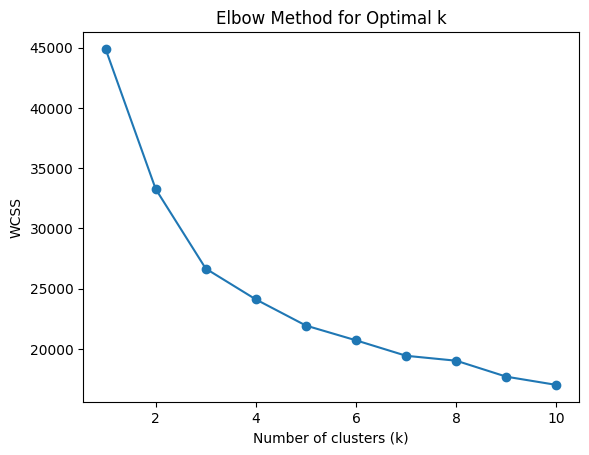

In [ ]:
plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
n=3
kmeans = KMeans(
    n_clusters=n,
    random_state=42,
)
kmeans.fit(scale_df)
cluster=kmeans.predict(scale_df)

In [ ]:
df1['furnishing_type']=cluster
#0 =unfurnish
#1=semi furnsih
#2=furnish

In [ ]:
df1.drop(columns=['furnishDetails','features','amenities_list','area'],axis=1,inplace=True)

In [ ]:
df1['nearbyLocations']=df1['nearbyLocations'].str.lower().str.replace('[','').str.replace(']','').str.replace("'",'').str.strip()

In [ ]:
location_weight = {
    'metro':10,
    'school':9,
    'mall':9,
    'hospital':9,
    'park/lake':8,
    'airport':7,
    'railway':7,
    'bank/atm':6,
    'petrol':5,
    'mandir':3
}

In [ ]:
category_keywords = {
    'metro': ['metro'],
    'bank/atm': ['bank', 'atm'],
    'hospital': ['hospital'],
    'school': ['school', 'college'],
    'mall': ['mall', 'cinema','food court',],
    'mandir': ['mandir', 'temple'],
    'park/lake': ['park', 'lake', 'garden'],
    'airport': ['airport'],
    'railway': ['railway station', 'junction'],
    'petrol': ['petrol', 'pump', 'fuel', 'oil']
}


In [ ]:
def compute_location_score(x):
    if pd.isna(x) or x.strip() == '':
        return 0

    places = x.lower().split(',')
    score = 0
    used_categories = set()

    for place in places:
        place = place.strip()

        for category, keywords in category_keywords.items():
            if category in used_categories:
                continue

            if any(k in place for k in keywords):
                score += location_weight[category]
                used_categories.add(category)
                break

    return score


In [ ]:
df1.loc[0,'nearbyLocations']

'chintapurni mandir, state bank atm, pearl dental clinic, taneja hospital, dr. ashok jain, dr. madan clinic, geeta nursing home gurgaon, chiranjiv hospital, dev man kathuria clinic, aryan hospital, kr dental hub, swastik maternity and medical centre, satyam hospital gurgaon, ravi clinic and health care centre, d.r. rajnis gupta clinic, esic hospital gurugram, gurgaon eye centre, bindal clinic, shiv mahima patient care bureau, shree krishna hospital gurgaon, m.s hospital, my care clinic, ankur clinic and maternity home, triveni hospital gurgaon, shri gobind hospital, navjeevan hospital and maternity centre, lal superspeciality hospital, sparsh hospital gurgaon, prateek nursing home and polyclinic, jain sant phool chand ji charitable hospital, sarvodya hospital, bhatnagar maternity and nursing home, tirath ram hospitals pvt ltd, dr. sarvejeet singh, centre for sight gurgaon new railway road, dr. ajay s. gupta clinic, kidney clinic, mangalam hospital and heart centre gurgaon, sethi hospit

In [ ]:
df1['location_score'] = df1['nearbyLocations'].apply(compute_location_score)


In [ ]:
df1.head(1)

society  price  price_per_sq.ft  bedRoom  bathroom balcony  \
0  maa bhagwati residency   0.45             5000        2         2       1   

   floorNum facing                                    nearbyLocations  type  \
0       4.0   West  chintapurni mandir, state bank atm, pearl dent...  flat   

     sector  Super_build_area  build_area  Carpet_area  Not available  \
0  sector 7               NaN         NaN        900.0              1   

   Study Room  Servant Room  Pooja Room  Others             age  luxury_score  \
0           0             0           0       0  relatively new            15   

   furnishing_type  location_score  
0                1              27

In [ ]:
df1.drop(columns=['nearbyLocations'],axis=1,inplace=True)

In [ ]:
df1.to_csv('gurgaon1.csv',index=False)